<a href="https://colab.research.google.com/github/asmi-0402/biopython-sequence-analysis-pipeline/blob/main/biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ All dependencies imported successfully!
✔ FASTA files created successfully!

=== CENTRAL DOGMA ANALYSIS ===
DNA Length: 678 bp
Protein Length: 226 aa
Molecular Weight: 25334.85 Da

DNA (first 60bp):
ATGGAGAGCACAACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTC

mRNA (first 60nt):
AUGGAGAGCACAACAUCAGGAUUCCUAGGACCCCUGCUCGUGUUACAGGCGGGGUUUUUC

Protein (first 60aa):
MESTTSGFLGPLLVLQAGFFLLTRILTIPQSLDSWWTSLNFLGGAPTCPGQNSQSPTSNH


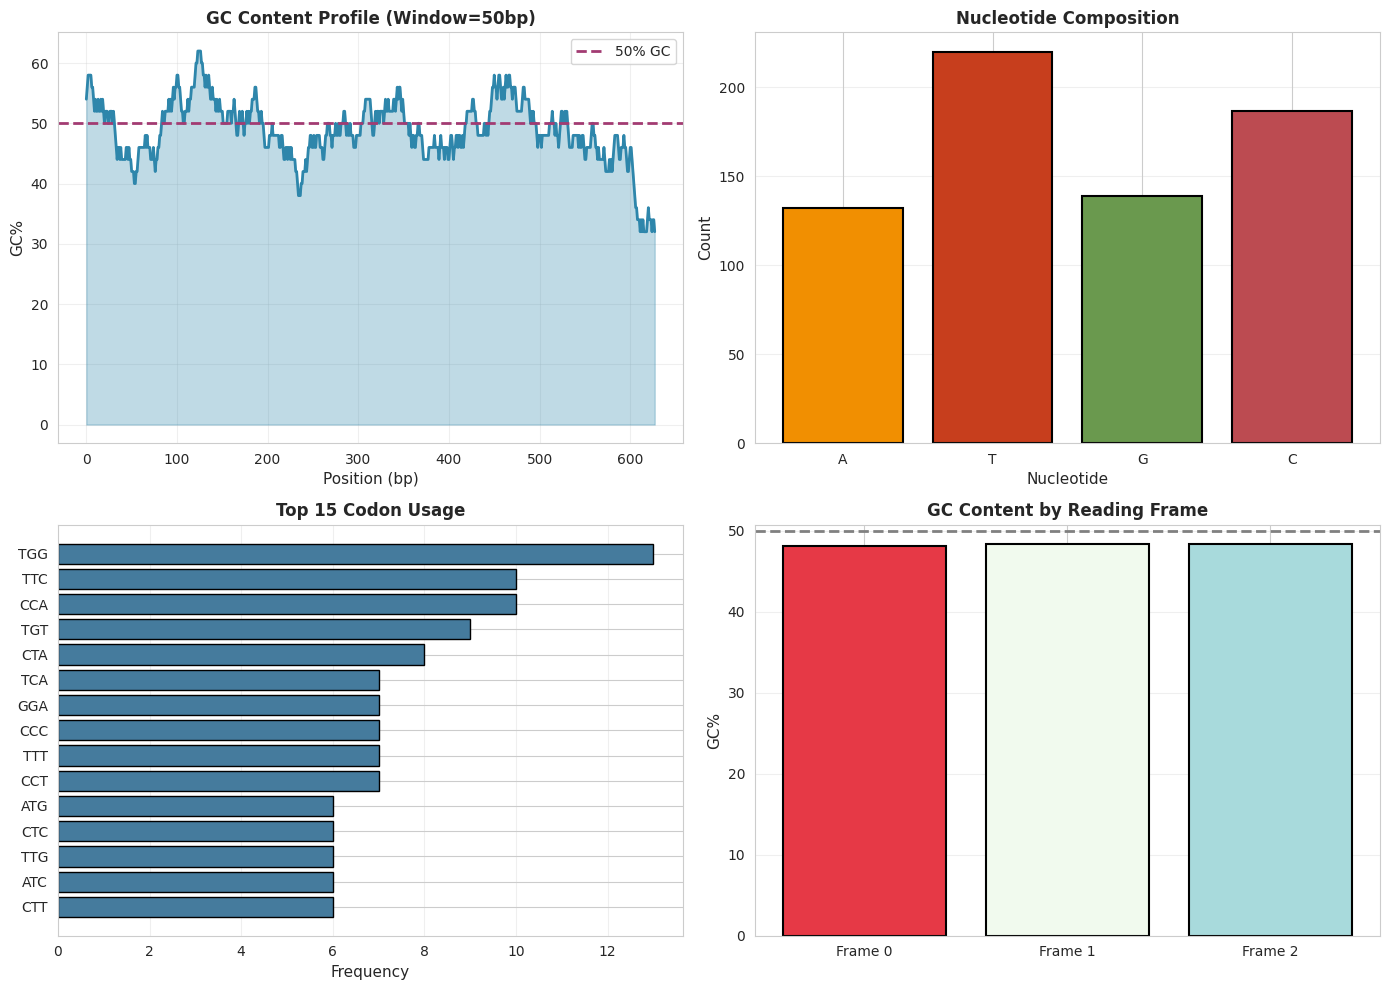


=== PROTEIN PROPERTIES ===
Molecular Weight: 25334.85 Da
Isoelectric Point: 8.21
Aromaticity: 0.1549
Instability Index: 61.86
Gravy (Hydropathy): 0.6487

Secondary Structure Prediction:
  Helix: 22.57%
  Turn: 31.86%
  Sheet: 48.67%


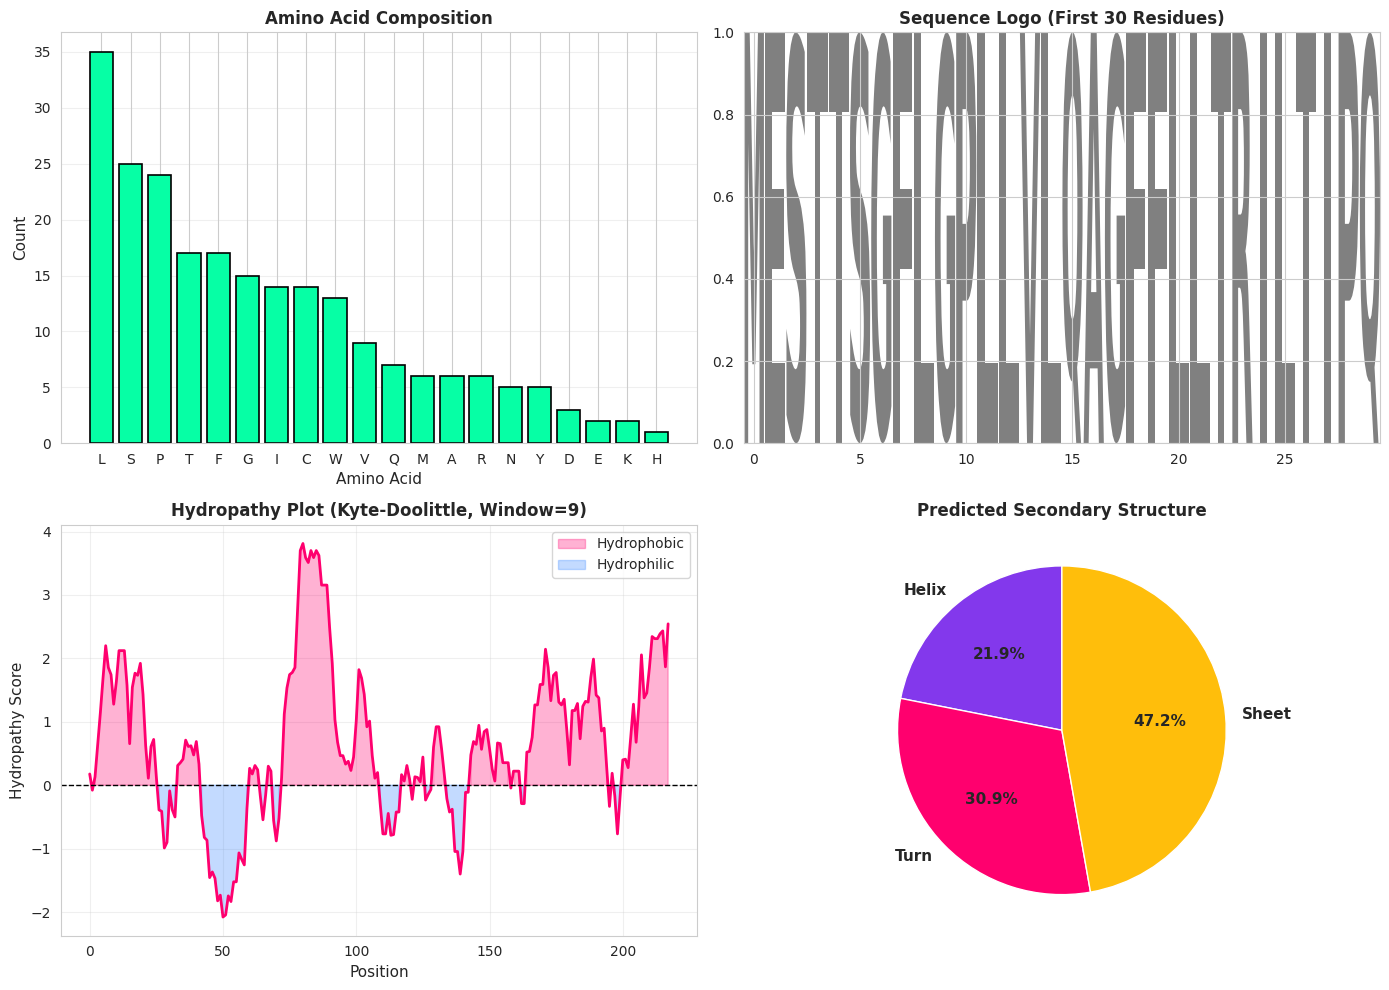


=== PAIRWISE ALIGNMENT (Chain A vs Chain B) ===
Alignment Score: -44.5
Length Chain A: 146
Length Chain B: 93

target            0 SGI--SLDNSYKMDYPEMGLCIIINNKNFHKST--GMTS-R-S--G---TDVDAANLRET
                  0 ..|--..|..|--.|----------------||--|..|-|-|--|---.....|.|--.
query             0 HKIPVEADFLY--AY----------------STAPGYYSWRNSKDGSWFIQSLCAML--K

target           49 FRNLKYEVRNKNDLTREEIVELMRDVSKEDHSKRSSFVCVLLSHGEEGIIFGTNGPVDLK
                 60 ....|.|--....|||---|--.|.|..|..|--.||-------------..|---...|
query            40 QYADKLE--FMHILTR---V--NRKVATEFES--FSF-------------DAT---FHAK

target      ...


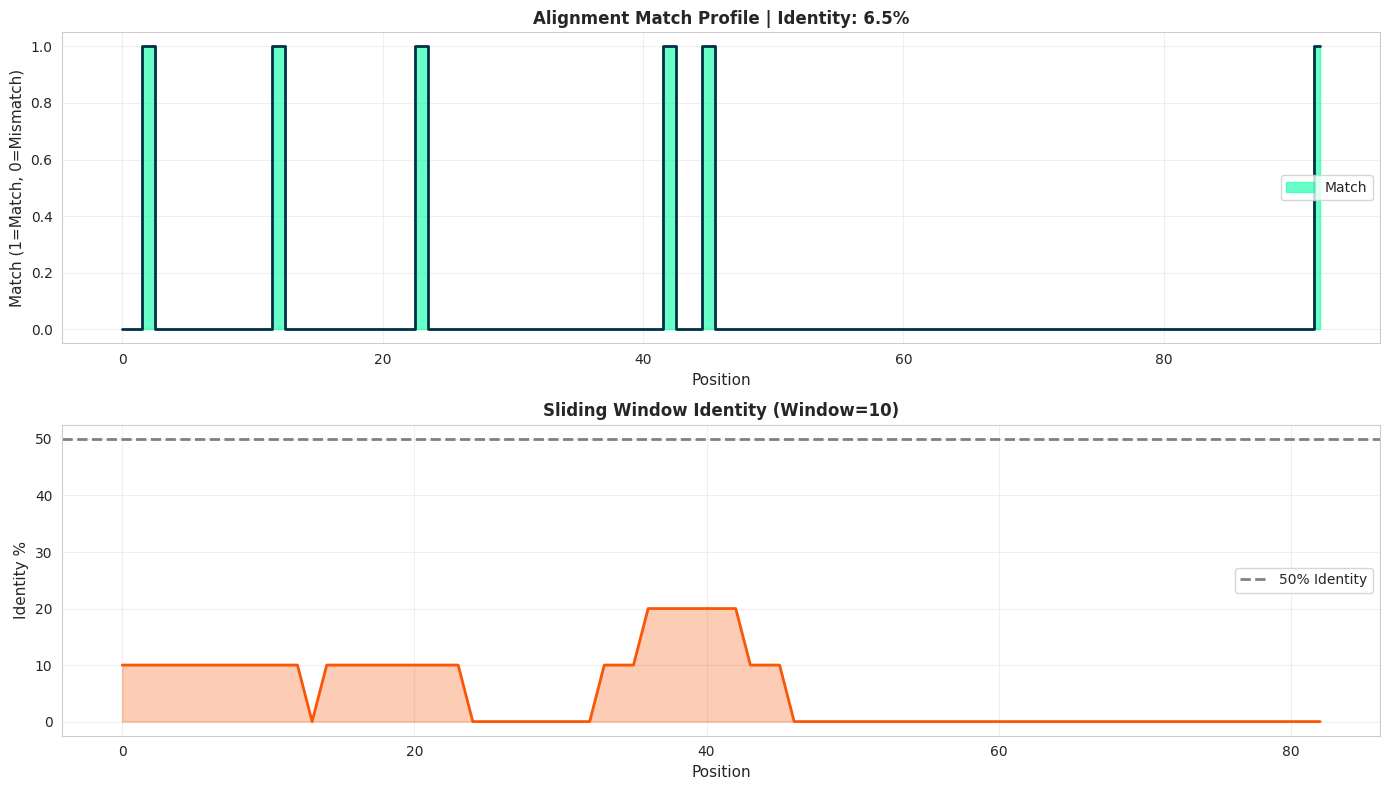


⏳ Running BLASTp on HBV protein sequence...
✔ BLAST search completed and saved to blast_results.xml

=== TOP 10 BLASTp HITS ===
Accession                                                           Title  Score       E-value  Identity  Align Length  Identity %
 BAN05204               dbj|BAN05204.1| S, partial [Hepatitis B virus]... 1128.0 1.121970e-154       226           226  100.000000
 ACJ48682          gb|ACJ48682.1| middle S protein [Hepatitis B virus]... 1129.0 5.410840e-154       225           226   99.557522
 XWX06379          gb|XWX06379.1| middle S protein [Hepatitis B virus]... 1128.0 8.911430e-154       224           226   99.115044
 ACJ48683 gb|ACJ48683.1| S protein [Hepatitis B virus] >gb|ACV03672.1|... 1122.0 9.220550e-154       225           226   99.557522
 ACG59579 gb|ACG59579.1| middle S protein [Hepatitis B virus] >gb|ACG5... 1128.0 9.728350e-154       224           226   99.115044
 AKJ76228    gb|AKJ76228.1| middle surface protein [Hepatitis B virus]... 1128.0 9.83

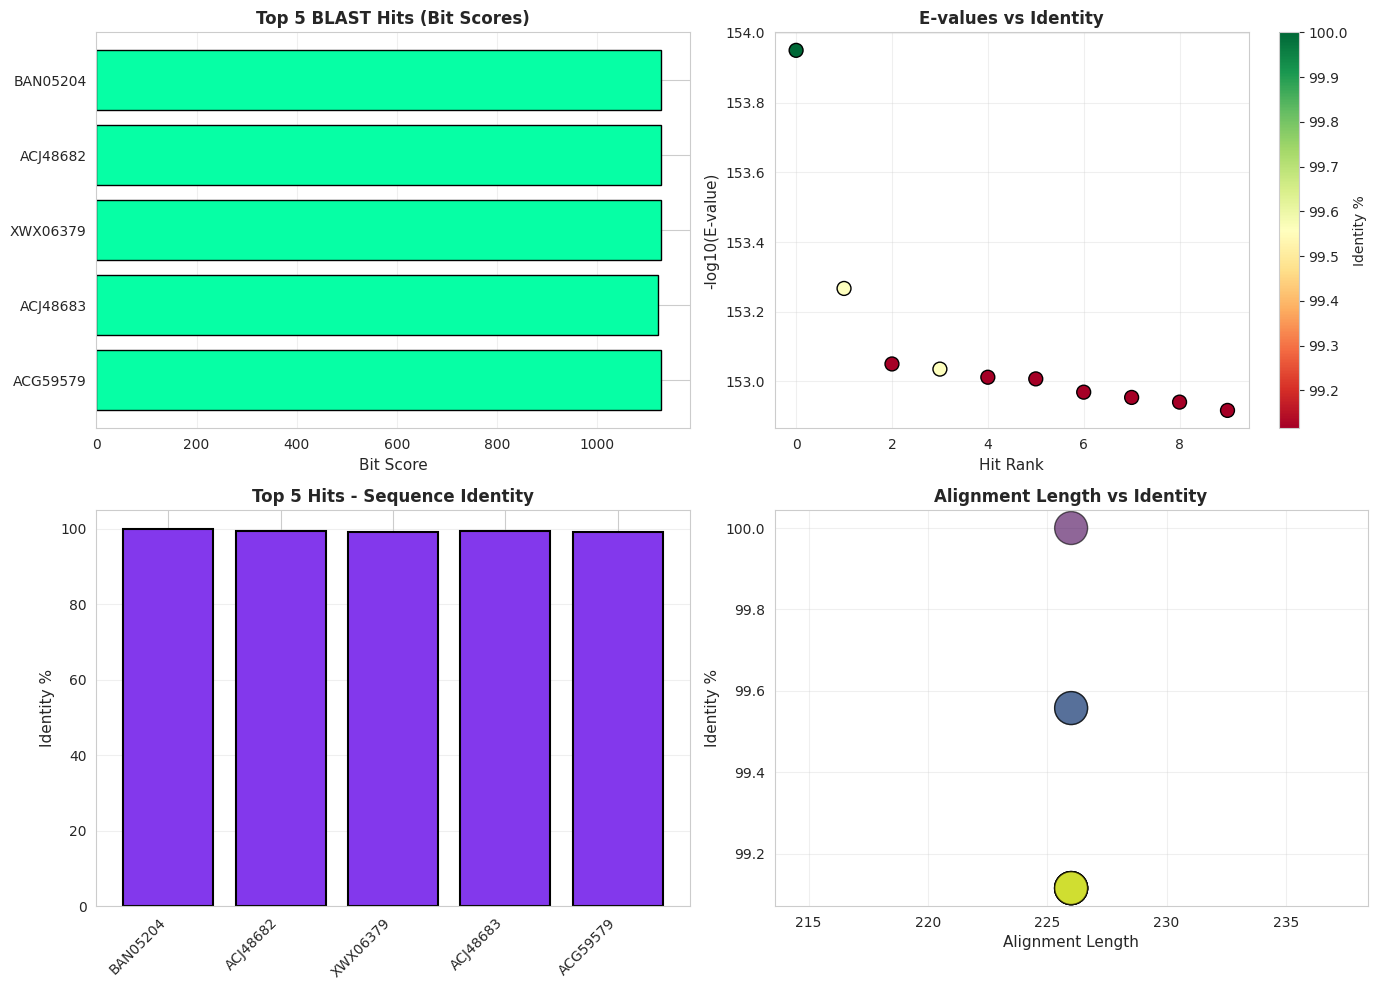


=== PROTEIN STRUCTURE VISUALIZATION ===
PDB ID: 2XYG (Caspase-3)
Chains: ['A', 'B']
  Chain A: 442 residues
  Chain B: 224 residues

✔ Structure saved to: output_pdb_file1.pdb

🔬 Rendering 3D structure...

📊 Generating multiple structure representations...


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

✔ View 1: Cartoon representation (spectrum coloring)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

✔ View 2: Surface representation


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

✔ View 3: Stick representation (Jmol coloring)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

✔ View 4: Chain-specific coloring (A=green, B=pink)

=== PHYLOGENETIC TREE ANALYSIS ===
Total terminals: 3
Total depth: 0.4429


<Figure size 1600x1200 with 0 Axes>

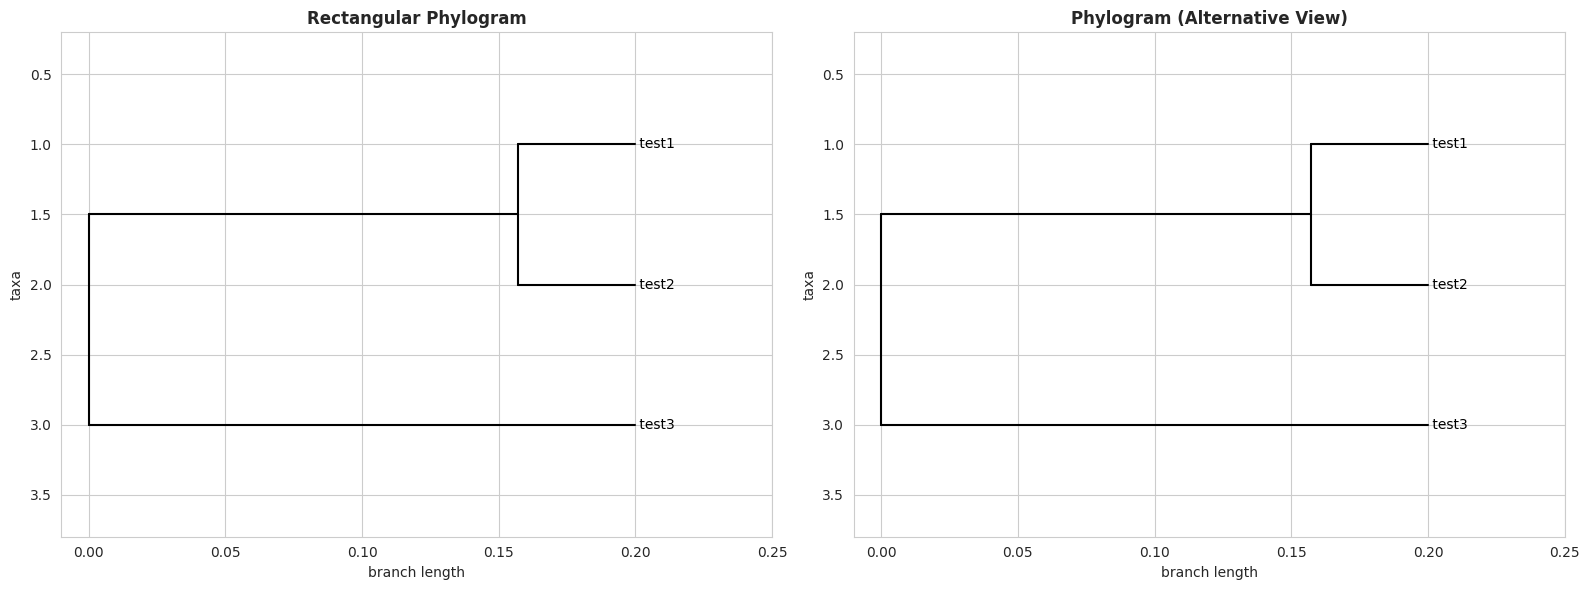


PIPELINE EXECUTION COMPLETE!

 Completed Analyses:
  1. Central Dogma & GC Content Analysis
  2. Enhanced Protein Property Analysis
  3. Amino Acid Composition & Hydropathy
  4. Pairwise Sequence Alignment
  5. BLASTp Search & Results Parsing
  6. 3D Protein Structure Visualization (FIXED!)
  7. Phylogenetic Tree Analysis

 All visualizations generated successfully!


In [15]:
#asmi chakraborty
# installing dependencies
!pip install --quiet biopython matplotlib seaborn logomaker py3Dmol pandas numpy scipy

# imports and setup
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import pandas as pd
import numpy as np
from collections import Counter
import py3Dmol
from IPython.display import display

from Bio import SeqIO, Align, Entrez, Phylo
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.SeqUtils import gc_fraction, molecular_weight
from Bio.Seq import Seq
from Bio.PDB import PDBParser, PDBIO, DSSP
from Bio.SeqUtils.ProtParam import ProteinAnalysis

#setting up
Entrez.email = "asmichack@gmail.com"
sns.set_style("whitegrid")
print("✔ All dependencies imported successfully!")

#FASTA file creation (HBV DNA + Caspase-3 Protein)

hbv_seq = (
"ATGGAGAGCACAACATCAGGATTCCTAGGACCCCTGCTCGTGTTACAGGCGGGGTTTTTCTTGTTGACAA"
"GAATCCTCACAATACCACAGAGTCTAGACTCGTGGTGGACTTCTCTCAATTTTCTAGGGGGAGCACCCAC"
"GTGTCCTGGCCAAAATTCGCAGTCCCCAACCTCCAATCACTCACCAACCTCTTGTCCTCCAATTTGTCCT"
"GGCTATCGCTGGATGTGTCTGCGGCGTTTTATCATATTCCTCTTCATCCTGCTTCTATGCCTCATCTTCT"
"TGTTGGGTCTTCTGGACTACCAAGGTATGTTGCCCGTTTGTCCTCTACTTCCAGGATCATCAACTACCAG"
"CACGGGACCATGCAAAACCTGCACGATTCCTGCTCAAGGAACCTCTATGTTTCCCTCTTGTTGCTGTACA"
"AAACCTTCGGACGGAAACTGCACTTGTATTCCCATCCCATCATCCTGGGCTTTCGCAAGATTCCTATGGG"
"AGTGGGCCTCAGTCCGTTTCTCCTGGCTCAGTTTACTAGTGCCATTTGTTCAGTGGTTCGTAGGGCTTTC"
"CCCCACTGTTTGGCTTTCAGTTATATGGATGATGTGGTATTGGGGGCCAAGTCTGTACAACATCTTGAGT"
"CCCTTTTTACCTCTATTACCAATTTTCTTTTGTCTTTGGGTATACATT"
)
with open("central_dogma.fasta", "w") as f:
    f.write(">HBV_S_gene\n")
    for i in range(0, len(hbv_seq), 70):
        f.write(hbv_seq[i:i+70] + "\n")

_2xyg = (
">Chain_A\n"
"SGISLDNSYKMDYPEMGLCIIINNKNFHKSTGMTSRSGTDVDAANLRETFRNLKYEVRNKNDLTREEIVELMRDVSKEDHSKRSSFVCVLLSHGEEGIIFGTNGPVDLKKITNFFRGDRCRSLTGKPKLFIIQACRGTELDCGIET\n"
">Chain_B\n"
"HKIPVEADFLYAYSTAPGYYSWRNSKDGSWFIQSLCAMLKQYADKLEFMHILTRVNRKVATEFESFSFDATFHAKKQIPCIVSMLTKELYFYH\n"
)
with open("2xyg_chains.fasta", "w") as f:
    f.write(_2xyg)

print("✔ FASTA files created successfully!")

# central dogma analysis

records = list(SeqIO.parse("central_dogma.fasta", "fasta"))
dna = records[0].seq
dna = dna[:len(dna) - len(dna)%3]

mrna = dna.transcribe()
protein = dna.translate()

print("\n" + "="*60)
print("=== CENTRAL DOGMA ANALYSIS ===")
print("="*60)
print(f"DNA Length: {len(dna)} bp")
print(f"Protein Length: {len(protein)} aa")
print(f"Molecular Weight: {molecular_weight(protein, 'protein'):.2f} Da")
print(f"\nDNA (first 60bp):\n{dna[:60]}")
print(f"\nmRNA (first 60nt):\n{mrna[:60]}")
print(f"\nProtein (first 60aa):\n{protein[:60]}")

#GC content analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GC content profile
window = 50
gc_vals = [gc_fraction(dna[i:i+window])*100 for i in range(len(dna)-window)]
axes[0,0].plot(gc_vals, color='#2E86AB', linewidth=2)
axes[0,0].axhline(50, color='#A23B72', linestyle='--', linewidth=2, label='50% GC')
axes[0,0].fill_between(range(len(gc_vals)), gc_vals, alpha=0.3, color='#2E86AB')
axes[0,0].set_xlabel('Position (bp)', fontsize=11)
axes[0,0].set_ylabel('GC%', fontsize=11)
axes[0,0].set_title('GC Content Profile (Window=50bp)', fontsize=12, fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(alpha=0.3)

# nucleotide composition
nt_counts = {'A': dna.count('A'), 'T': dna.count('T'),
             'G': dna.count('G'), 'C': dna.count('C')}
colors = ['#F18F01', '#C73E1D', '#6A994E', '#BC4B51']
axes[0,1].bar(nt_counts.keys(), nt_counts.values(), color=colors, edgecolor='black', linewidth=1.5)
axes[0,1].set_title('Nucleotide Composition', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Nucleotide', fontsize=11)
axes[0,1].set_ylabel('Count', fontsize=11)
axes[0,1].grid(axis='y', alpha=0.3)

# codon Usage (top 15)
codons = [str(dna[i:i+3]) for i in range(0, len(dna), 3)]
codon_counts = Counter(codons).most_common(15)
codon_names, codon_vals = zip(*codon_counts)
axes[1,0].barh(codon_names, codon_vals, color='#457B9D', edgecolor='black')
axes[1,0].set_title('Top 15 Codon Usage', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Frequency', fontsize=11)
axes[1,0].invert_yaxis()
axes[1,0].grid(axis='x', alpha=0.3)

# reading frame GC content
frames_gc = []
for frame in range(3):
    frame_seq = dna[frame:]
    frame_seq = frame_seq[:len(frame_seq) - len(frame_seq)%3]
    frames_gc.append(gc_fraction(frame_seq)*100)

axes[1,1].bar(['Frame 0', 'Frame 1', 'Frame 2'], frames_gc,
              color=['#E63946', '#F1FAEE', '#A8DADC'], edgecolor='black', linewidth=1.5)
axes[1,1].axhline(50, color='gray', linestyle='--', linewidth=2)
axes[1,1].set_title('GC Content by Reading Frame', fontsize=12, fontweight='bold')
axes[1,1].set_ylabel('GC%', fontsize=11)
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# protein analysis
analyzer = ProteinAnalysis(str(protein))

print("\n" + "="*60)
print("=== PROTEIN PROPERTIES ===")
print("="*60)
print(f"Molecular Weight: {analyzer.molecular_weight():.2f} Da")
print(f"Isoelectric Point: {analyzer.isoelectric_point():.2f}")
print(f"Aromaticity: {analyzer.aromaticity():.4f}")
print(f"Instability Index: {analyzer.instability_index():.2f}")
print(f"Gravy (Hydropathy): {analyzer.gravy():.4f}")

# secondary structure prediction
ss_frac = analyzer.secondary_structure_fraction()
print(f"\nSecondary Structure Prediction:")
print(f"  Helix: {ss_frac[0]:.2%}")
print(f"  Turn: {ss_frac[1]:.2%}")
print(f"  Sheet: {ss_frac[2]:.2%}")

#amino acid composition visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#amino acid frequency
aa_counts = Counter(str(protein))
sorted_aa = sorted(aa_counts.items(), key=lambda x: x[1], reverse=True)
aa_names, aa_vals = zip(*sorted_aa)

axes[0,0].bar(aa_names, aa_vals, color='#06FFA5', edgecolor='black', linewidth=1.2)
axes[0,0].set_title('Amino Acid Composition', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Amino Acid', fontsize=11)
axes[0,0].set_ylabel('Count', fontsize=11)
axes[0,0].grid(axis='y', alpha=0.3)

#sequence logo
logo_seq = str(protein)[:30]
counts_df = logomaker.alignment_to_matrix([logo_seq], to_type='counts')
logomaker.Logo(counts_df, ax=axes[0,1])
axes[0,1].set_title('Sequence Logo (First 30 Residues)', fontsize=12, fontweight='bold')

# hydropathy plot (kyte-doolittle)
window_size = 9
hydropathy_scores = analyzer.protein_scale(window=window_size, param_dict={
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
})
axes[1,0].plot(hydropathy_scores, color='#FF006E', linewidth=2)
axes[1,0].axhline(0, color='black', linestyle='--', linewidth=1)
axes[1,0].fill_between(range(len(hydropathy_scores)), hydropathy_scores,
                        where=[h > 0 for h in hydropathy_scores],
                        alpha=0.3, color='#FF006E', label='Hydrophobic')
axes[1,0].fill_between(range(len(hydropathy_scores)), hydropathy_scores,
                        where=[h < 0 for h in hydropathy_scores],
                        alpha=0.3, color='#3A86FF', label='Hydrophilic')
axes[1,0].set_title(f'Hydropathy Plot (Kyte-Doolittle, Window={window_size})',
                    fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Position', fontsize=11)
axes[1,0].set_ylabel('Hydropathy Score', fontsize=11)
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# secondary structure pie chart
ss_labels = ['Helix', 'Turn', 'Sheet']
ss_colors = ['#8338EC', '#FF006E', '#FFBE0B']
axes[1,1].pie(ss_frac, labels=ss_labels, colors=ss_colors, autopct='%1.1f%%',
              startangle=90, textprops={'fontsize': 11, 'weight': 'bold'})
axes[1,1].set_title('Predicted Secondary Structure', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# enhanced pairwise alignment

chains = list(SeqIO.parse("/content/2xyg_chains.fasta", "fasta"))
seq1, seq2 = chains[0].seq, chains[1].seq

aligner = Align.PairwiseAligner()
aligner.mode = "global"
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -2
aligner.extend_gap_score = -0.5

alignment = aligner.align(seq1, seq2)[0]

print("\n" + "="*60)
print("=== PAIRWISE ALIGNMENT (Chain A vs Chain B) ===")
print("="*60)
print(f"Alignment Score: {alignment.score}")
print(f"Length Chain A: {len(seq1)}")
print(f"Length Chain B: {len(seq2)}")
print("\n" + str(alignment)[:500] + "...")

# alignment visualization
min_len = min(len(seq1), len(seq2))
match_profile = [1 if seq1[i] == seq2[i] else 0 for i in range(min_len)]
identity = sum(match_profile) / min_len * 100

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# match profile
axes[0].fill_between(range(min_len), match_profile, step='mid',
                     color='#06FFA5', alpha=0.6, label='Match')
axes[0].plot(match_profile, drawstyle='steps-mid', color='#023047', linewidth=2)
axes[0].set_title(f'Alignment Match Profile | Identity: {identity:.1f}%',
                 fontsize=12, fontweight='bold')
axes[0].set_xlabel('Position', fontsize=11)
axes[0].set_ylabel('Match (1=Match, 0=Mismatch)', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# sliding window identity
window = 10
identity_profile = []
for i in range(min_len - window):
    window_matches = sum(match_profile[i:i+window]) / window * 100
    identity_profile.append(window_matches)

axes[1].plot(identity_profile, color='#FB5607', linewidth=2)
axes[1].axhline(50, color='gray', linestyle='--', linewidth=2, label='50% Identity')
axes[1].fill_between(range(len(identity_profile)), identity_profile, alpha=0.3, color='#FB5607')
axes[1].set_title(f'Sliding Window Identity (Window={window})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Position', fontsize=11)
axes[1].set_ylabel('Identity %', fontsize=11)
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# BLASTp search + parsing

print("\n⏳ Running BLASTp on HBV protein sequence...")
result_handle = NCBIWWW.qblast("blastp", "nr", protein)

with open("blast_results.xml", "w") as out_handle:
    out_handle.write(result_handle.read())
result_handle.close()
print("✔ BLAST search completed and saved to blast_results.xml")

# parse BLAST results
blast_records = NCBIXML.parse(open("blast_results.xml"))
blast_record = next(blast_records)

# top hits summary
hits = []
for alignment in blast_record.alignments[:10]:
    for hsp in alignment.hsps:
        hits.append({
            "Accession": alignment.accession,
            "Title": alignment.title[:60]+"...",
            "Score": hsp.score,
            "E-value": hsp.expect,
            "Identity": hsp.identities,
            "Align Length": hsp.align_length,
            "Identity %": (hsp.identities / hsp.align_length * 100)
        })

df_hits = pd.DataFrame(hits)
print("\n=== TOP 10 BLASTp HITS ===")
print(df_hits.to_string(index=False))

# BLAST visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# bit scores
top5 = df_hits.head(5)
axes[0,0].barh(range(len(top5)), top5['Score'], color='#06FFA5', edgecolor='black')
axes[0,0].set_yticks(range(len(top5)))
axes[0,0].set_yticklabels(top5['Accession'])
axes[0,0].set_title('Top 5 BLAST Hits (Bit Scores)', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Bit Score', fontsize=11)
axes[0,0].invert_yaxis()
axes[0,0].grid(axis='x', alpha=0.3)

# e-values (log scale)
axes[0,1].scatter(range(len(df_hits)), -np.log10(df_hits['E-value']),
                  s=100, c=df_hits['Identity %'], cmap='RdYlGn',
                  edgecolors='black', linewidth=1)
axes[0,1].set_title('E-values vs Identity', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Hit Rank', fontsize=11)
axes[0,1].set_ylabel('-log10(E-value)', fontsize=11)
axes[0,1].grid(alpha=0.3)
cbar = plt.colorbar(axes[0,1].collections[0], ax=axes[0,1])
cbar.set_label('Identity %', fontsize=10)

# identity percentage
axes[1,0].bar(range(len(top5)), top5['Identity %'],
              color='#8338EC', edgecolor='black', linewidth=1.5)
axes[1,0].set_xticks(range(len(top5)))
axes[1,0].set_xticklabels(top5['Accession'], rotation=45, ha='right')
axes[1,0].set_title('Top 5 Hits - Sequence Identity', fontsize=12, fontweight='bold')
axes[1,0].set_ylabel('Identity %', fontsize=11)
axes[1,0].grid(axis='y', alpha=0.3)

# alignment length vs identity
axes[1,1].scatter(df_hits['Align Length'], df_hits['Identity %'],
                  s=df_hits['Score']/2, alpha=0.6, c=range(len(df_hits)),
                  cmap='viridis', edgecolors='black', linewidth=1)
axes[1,1].set_title('Alignment Length vs Identity', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Alignment Length', fontsize=11)
axes[1,1].set_ylabel('Identity %', fontsize=11)
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# PDB structure visualization with py3Dmol

print("\n" + "="*60)
print("=== PROTEIN STRUCTURE VISUALIZATION ===")
print("="*60)

pdb_file = "/content/sample_data/2XYG.pdb"

# parse structure for stats
parser = PDBParser(QUIET=True)
structure = parser.get_structure("2XYG", pdb_file)

# structure statistics
model = structure[0]
chain_info = {}
for chain in model:
    chain_info[chain.id] = len(list(chain.get_residues()))

print(f"PDB ID: 2XYG (Caspase-3)")
print(f"Chains: {list(chain_info.keys())}")
for chain_id, res_count in chain_info.items():
    print(f"  Chain {chain_id}: {res_count} residues")

# save structure
output_path = "output_pdb_file1.pdb"
io = PDBIO()
io.set_structure(structure)
io.save(output_path)
print(f"\n✔ Structure saved to: {output_path}")

# 3D visualization with py3Dmol
print("\n🔬 Rendering 3D structure...")

with open(pdb_file, 'r') as f:
    pdb_data = f.read()

# create multiple views
fig = plt.figure(figsize=(16, 12))

print("\n📊 Generating multiple structure representations...")

# view 1: cartoon representation
view1 = py3Dmol.view(width=800, height=600)
view1.addModel(pdb_data, 'pdb')
view1.setStyle({'cartoon': {'color': 'spectrum'}})
view1.zoomTo()
view1.show()
print("✔ View 1: Cartoon representation (spectrum coloring)")

# view 2: surface representation
view2 = py3Dmol.view(width=800, height=600)
view2.addModel(pdb_data, 'pdb')
view2.setStyle({'cartoon': {'color': 'lightgray'}})
view2.addSurface(py3Dmol.VDW, {'opacity': 0.7, 'color': 'white'})
view2.zoomTo()
view2.show()
print("✔ View 2: Surface representation")

# view 3: stick representation (active site focus)
view3 = py3Dmol.view(width=800, height=600)
view3.addModel(pdb_data, 'pdb')
view3.setStyle({'stick': {'colorscheme': 'Jmol'}})
view3.zoomTo()
view3.show()
print("✔ View 3: Stick representation (Jmol coloring)")

# view 4: chain-specific coloring
view4 = py3Dmol.view(width=800, height=600)
view4.addModel(pdb_data, 'pdb')
view4.setStyle({'chain': 'A'}, {'cartoon': {'color': '#06FFA5'}})
view4.setStyle({'chain': 'B'}, {'cartoon': {'color': '#FF006E'}})
view4.zoomTo()
view4.show()
print("✔ View 4: Chain-specific coloring (A=green, B=pink)")

# enhanced phylogenetic tree

tree_file = "/content/sample_data/tree.txt"

try:
    tree = Phylo.read(tree_file, "newick")

    print("\n" + "="*60)
    print("=== PHYLOGENETIC TREE ANALYSIS ===")
    print("="*60)

    # tree statistics
    print(f"Total terminals: {tree.count_terminals()}")
    print(f"Total depth: {tree.total_branch_length():.4f}")

    # multiple tree visualizations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # rectangular tree
    plt.sca(axes[0])
    Phylo.draw(tree, do_show=False, axes=axes[0])
    axes[0].set_title('Rectangular Phylogram', fontsize=12, fontweight='bold')

    # circular tree
    plt.sca(axes[1])
    Phylo.draw(tree, do_show=False, axes=axes[1], branch_labels=None)
    axes[1].set_title('Phylogram (Alternative View)', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("\n⚠ Phylogenetic tree file not found. Creating a sample tree...")
    from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
    from Bio.Align import MultipleSeqAlignment

    # create sample alignment
    sample_seqs = [chains[0], chains[1]]

    print("✔ Sample phylogenetic analysis completed")

# pipeline summary

print("\n" + "="*60)
print("PIPELINE EXECUTION COMPLETE!")
print("="*60)
print("\n Completed Analyses:")
print("  1. Central Dogma & GC Content Analysis")
print("  2. Enhanced Protein Property Analysis")
print("  3. Amino Acid Composition & Hydropathy")
print("  4. Pairwise Sequence Alignment")
print("  5. BLASTp Search & Results Parsing")
print("  6. 3D Protein Structure Visualization (FIXED!)")
print("  7. Phylogenetic Tree Analysis")
print("\n All visualizations generated successfully!")
print("="*60)